<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP1/7506R_TP1_GRUPO24_CHP2_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico 1: Reservas de Hotel

## 𝔾𝕣𝕦𝕡𝕠 𝟚𝟜 (Merequetengue👍)

      ➢ Torraca Lautaro - 108813
      ➢ Negrotti Gianluca - 108184
      ➢ Marco Tosi - 107237

### » Imports

In [7059]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import MinMaxScaler

from google.colab import files

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# » Lectura de los archivos

In [7060]:
url_train = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/hotels_train.csv'
url_test = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/test_limpio%20-%20ds_unificado.csv'

ds_train_base = pd.read_csv(url_train)
ds_test_base = pd.read_csv(url_test)

ds_test = ds_test_base.copy()
df_test = pd.DataFrame(ds_test_base)

ds_train = ds_train_base.copy()
df_train = pd.DataFrame(ds_train_base)

# » Analisis del DataSet de train


Realizamos un breve analizis sobre el dataset para ver valores atipicos y/o valores nulos los cuales no queremos tenerlos en cuenta.

### » Muestra del DataSet de Train


In [7061]:
ds_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


#### - **Cantidad de columnas y filas**

In [7062]:
ds_train.shape

(61913, 31)

### » Tipos de las varibales

In [7063]:
ds_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

### » Separación de variables cuantitativas

In [7064]:
nombre_variables_cuantitativas = ['lead_time','arrival_date_week_number', 'stays_in_weekend_nights', 'adults',
                                  'children','babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                                  'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]

ds_cuantitativo = ds_train.loc[:, nombre_variables_cuantitativas]
df = pd.DataFrame()
df['media'] = round(ds_cuantitativo.mean(), 2)
df['mediana'] = ds_cuantitativo.median()
df['moda'] = ds_cuantitativo.mode().iloc[0]
df['max'] = ds_cuantitativo.max()
df

,media,mediana,moda,max
lead_time,112.25,78.0,0.0,629.0
arrival_date_week_number,27.22,28.0,33.0,53.0
stays_in_weekend_nights,0.92,1.0,0.0,16.0
adults,1.86,2.0,2.0,55.0
children,0.10,0.0,0.0,10.0
babies,0.01,0.0,0.0,9.0
is_repeated_guest,0.03,0.0,0.0,1.0
previous_cancellations,0.11,0.0,0.0,26.0
previous_bookings_not_canceled,0.12,0.0,0.0,70.0
booking_changes,0.20,0.0,0.0,17.0


### » Separación de las variables cualitativas

In [7065]:
nombre_variables_cualitativas = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'reserved_room_type', 'distribution_channel', 'assigned_room_type',
                                 'deposit_type', 'customer_type']

ds_cualitativo = ds_train.loc[:, nombre_variables_cualitativas]

### » Cantidad de valores que admiten las varibles cualitativas.

In [7066]:
ds_cualitativo.nunique().sort_values(ascending=True)

hotel                     2
deposit_type              3
customer_type             4
meal                      5
distribution_channel      5
market_segment            8
reserved_room_type       10
arrival_date_month       12
assigned_room_type       12
country                 149
dtype: int64

### » Frecuencia de los valores

- **Hoteles.**

In [7067]:
round(ds_cualitativo.hotel.value_counts(normalize=True) * 100, 2)

City Hotel      68.05
Resort Hotel    31.95
Name: hotel, dtype: float64


- **Tipo de depósito.**

In [7068]:
round(ds_cualitativo.deposit_type.value_counts(normalize=True) * 100, 2)

No Deposit    83.48
Non Refund    16.39
Refundable     0.13
Name: deposit_type, dtype: float64

tiene Undefined


- **Canal de distribución.**

In [7069]:
round(ds_cualitativo.distribution_channel.value_counts(normalize=True) * 100, 2)

TA/TO        83.74
Direct       10.98
Corporate     5.12
GDS           0.14
Undefined     0.01
Name: distribution_channel, dtype: float64

- **Tipo de cliente.**

In [7070]:
round(ds_cualitativo.customer_type.value_counts(normalize=True) * 100, 2)

Transient          76.64
Transient-Party    19.65
Contract            3.28
Group               0.42
Name: customer_type, dtype: float64

- **Comida.**

In [7071]:
round(ds_cualitativo.meal.value_counts(normalize=True) * 100, 2)

BB           77.26
HB           12.04
SC            8.97
Undefined     0.95
FB            0.77
Name: meal, dtype: float64

tiene Undefined

- **Segmento de mercado (método de reserva).**

In [7072]:
round(ds_cualitativo.market_segment.value_counts(normalize=True) * 100, 3)

Online TA        47.274
Offline TA/TO    20.002
Groups           18.647
Direct            9.299
Corporate         4.012
Complementary     0.580
Aviation          0.183
Undefined         0.003
Name: market_segment, dtype: float64

- **Mes de llegada**

In [7073]:
round(ds_cualitativo.arrival_date_month.value_counts(normalize=True) * 100, 2)

August       11.59
July         10.54
May           9.95
April         9.49
October       9.47
June          9.32
September     9.08
March         7.91
February      6.66
December      5.64
November      5.50
January       4.85
Name: arrival_date_month, dtype: float64

- **País**

In [7074]:
ds_cualitativo.country.value_counts(normalize=True) * 100

PRT    45.305712
GBR     9.292939
FRA     7.795176
ESP     6.824224
DEU     5.368605
         ...    
HND     0.001621
FJI     0.001621
LIE     0.001621
ATA     0.001621
RWA     0.001621
Name: country, Length: 149, dtype: float64

### » Separacion de las variables ordinales

In [7075]:
nombre_variables_ordinales = ['reserved_room_type', 'assigned_room_type']

ds_ordinales = ds_train.loc[:, nombre_variables_ordinales]

- **Tipo de habitación reservada.**

In [7076]:
round(ds_ordinales.reserved_room_type.value_counts(normalize=True) * 100, 3)

A    72.899
D    15.481
E     5.248
F     2.344
G     1.761
B     0.937
C     0.779
H     0.539
P     0.011
L     0.002
Name: reserved_room_type, dtype: float64

- **Tipo de habitación asignada**

In [7077]:
round(ds_ordinales.assigned_room_type.value_counts(normalize=True) * 100, 3)

A    64.618
D    19.689
E     6.104
F     2.941
G     2.063
C     1.820
B     1.706
H     0.620
I     0.234
K     0.192
P     0.011
L     0.002
Name: assigned_room_type, dtype: float64

# » Analisis de nulos en el DataSet

In [7078]:
ds_train.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


# » Valores atipicos e imputaciones.


Luego de analizar los valores mostrados anteriormente procedemos a relizar distintas tectnicas de imputaciones a los valores que consideramos como outsiders y que creemos que pueden ser utiles para la prediccion.


- **Adulto**

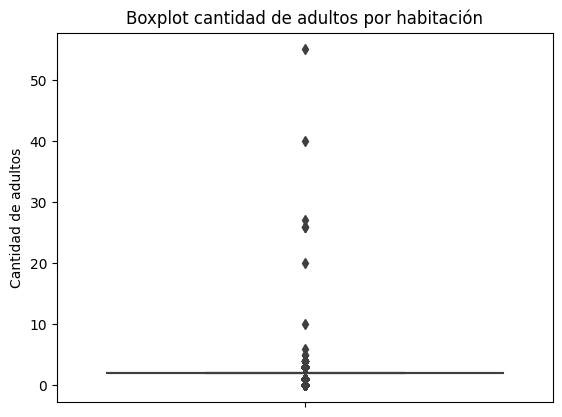

In [7079]:
grf = sns.boxplot(y=ds_train.adults, data= ds_train ).set(title="Boxplot cantidad de adultos por habitación",xlabel="",ylabel="Cantidad de adultos")

  Filtrado de los datos

In [7080]:
ds_adults = ds_train.loc[:, 'adults']

df_train['adults'].mask(df_train['adults'] >= 8, ds_adults.median(), inplace=True)
df_train['adults'].mask(df_train['adults'] < 1, ds_adults.median(), inplace=True)

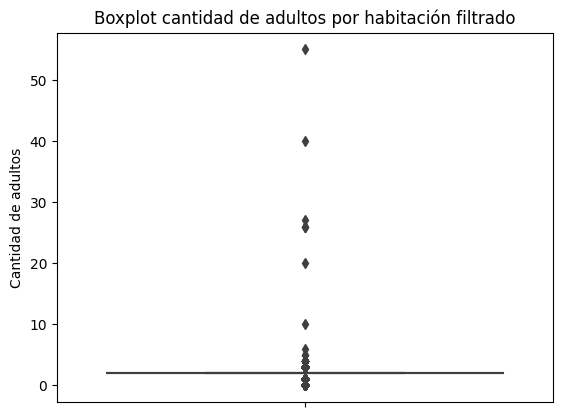

In [7081]:
grf = sns.boxplot(y=ds_adults, data= df_train ).set(title="Boxplot cantidad de adultos por habitación filtrado",xlabel="",ylabel="Cantidad de adultos")

- **Hijos**


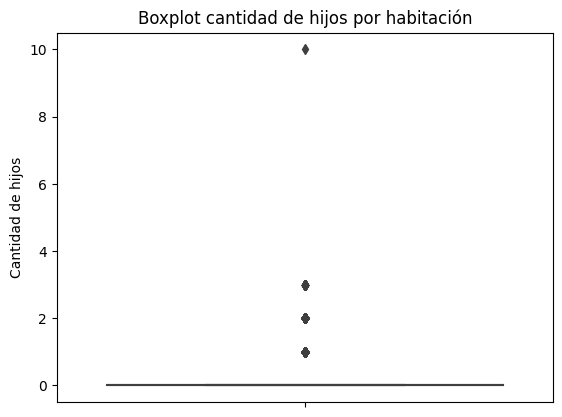

In [7082]:
grf = sns.boxplot(y=df_train.children, data= df_train).set(title="Boxplot cantidad de hijos por habitación",xlabel="",ylabel="Cantidad de hijos")

Filtrado de los datos

In [7083]:
ds_children = df_train.loc[:, 'children']

df_train['children'].mask(df_train['children'] >= 6, ds_children.median(), inplace=True)
df_train['children'].mask(df_train['children'] < 1, ds_children.median(), inplace=True)

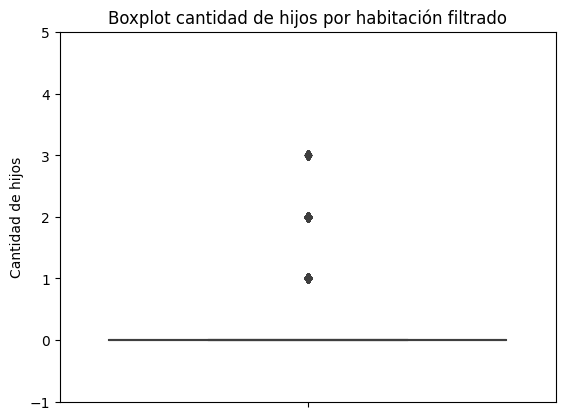

In [7084]:
grf = sns.boxplot(y=ds_children, data= df_train ).set(title="Boxplot cantidad de hijos por habitación filtrado",xlabel="",ylabel="Cantidad de hijos")
plt.ylim(-1,5)
plt.show()

- **Bebes**

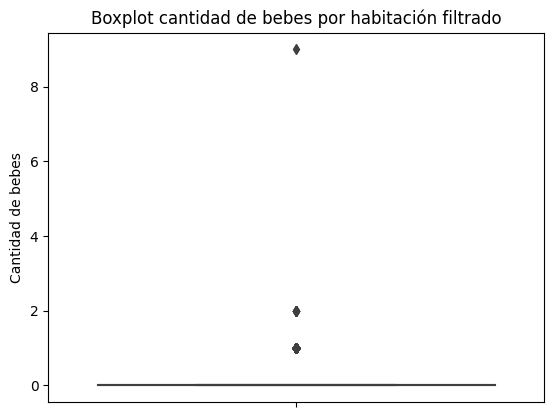

In [7085]:
grf = sns.boxplot(y=df_train.babies, data= df_train ).set(title="Boxplot cantidad de bebes por habitación filtrado",xlabel="",ylabel="Cantidad de bebes")

Filtrado de los datos

In [7086]:
ds_babies = df_train.loc[:, 'babies']

df_train['babies'].mask(df_train['babies'] >= 4, ds_babies.median(), inplace=True)
df_train['babies'].mask(df_train['babies'] < 1, ds_babies.median(), inplace=True)

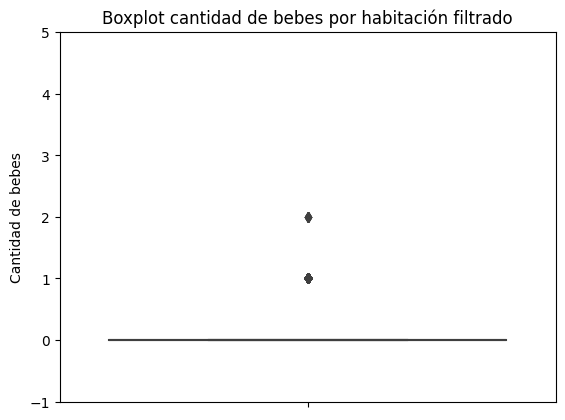

In [7087]:
grf = sns.boxplot(y=ds_babies, data= df_train ).set(title="Boxplot cantidad de bebes por habitación filtrado",xlabel="",ylabel="Cantidad de bebes")
plt.ylim(-1,5)
plt.show()

- **Playas de estacionamientos**

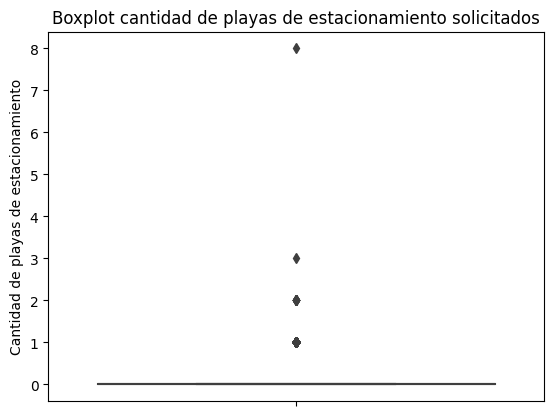

In [7088]:
grf = sns.boxplot(y=df_train.required_car_parking_spaces, data= df_train ).set(title="Boxplot cantidad de playas de estacionamiento solicitados",xlabel="",ylabel="Cantidad de playas de estacionamiento")

Filtrado de los datos

In [7089]:
ds_required_car_parking_spaces = df_train.loc[:, 'required_car_parking_spaces']

df_train['required_car_parking_spaces'].mask(df_train['required_car_parking_spaces'] > 3, ds_required_car_parking_spaces.median(), inplace=True)
df_train['required_car_parking_spaces'].mask(df_train['required_car_parking_spaces'] < 1, ds_required_car_parking_spaces.median(), inplace=True)

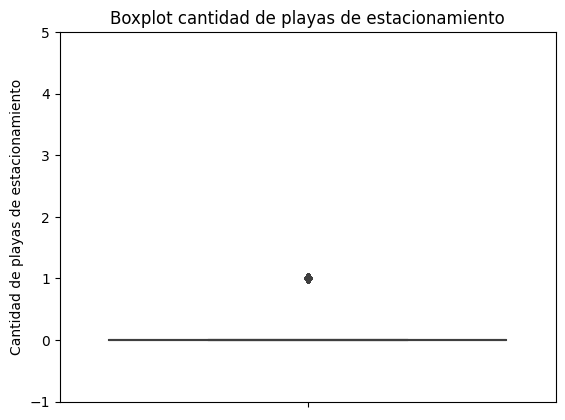

In [7090]:
grf = sns.boxplot(y=ds_required_car_parking_spaces, data= ds_required_car_parking_spaces ).set(title="Boxplot cantidad de playas de estacionamiento",xlabel="",ylabel="Cantidad de playas de estacionamiento")
plt.ylim(-1,5)
plt.show()

## - **Muestra del DataSet limpio**

In [7091]:
nombre_variables_cuantitativas = ['lead_time','arrival_date_week_number', 'stays_in_weekend_nights', 'adults',
                                  'children','babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                                  'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]

ds_cuantitativo = df_train.loc[:, nombre_variables_cuantitativas]
df = pd.DataFrame()
df['media'] = round(ds_cuantitativo.mean(), 2)
df['mediana'] = ds_cuantitativo.median()
df['moda'] = ds_cuantitativo.mode().iloc[0]
df['max'] = ds_cuantitativo.max()
df

,media,mediana,moda,max
lead_time,112.25,78.0,0.0,629.0
arrival_date_week_number,27.22,28.0,33.0,53.0
stays_in_weekend_nights,0.92,1.0,0.0,16.0
adults,1.87,2.0,2.0,6.0
children,0.10,0.0,0.0,3.0
babies,0.01,0.0,0.0,2.0
is_repeated_guest,0.03,0.0,0.0,1.0
previous_cancellations,0.11,0.0,0.0,26.0
previous_bookings_not_canceled,0.12,0.0,0.0,70.0
booking_changes,0.20,0.0,0.0,17.0


# »  Preparacion de los DataSets

Procedemos a preparar ambos DataSets para poder entrenar y predecir.

- Analizamos la cantidad de columnas y filas



In [7092]:
print('Train:', ds_train.shape)
print('Test:', ds_test.shape)

Train: (61913, 31)
Test: (26535, 31)


Buscamos las columans que no coinciden en ambos DataSets


In [7093]:
columnas_faltantes_en_train = set(ds_test.columns) - set(ds_train.columns)
columnas_faltantes_en_test = set(ds_train.columns)- set(ds_test.columns)
print('Columnas faltantes es train:', columnas_faltantes_en_train)
print('Columnas faltantes es test:', columnas_faltantes_en_test)

Columnas faltantes es train: {'reservation_status_date'}
Columnas faltantes es test: {'is_canceled'}


Vemos que el dataSet de test tiene una columan de mas que no se encuentra en train, por lo que prodecemos a eliminarla ya que creemos que no es relevante para el calculo del is_canceled.



#### - **Arreglo del DataSet de test**

Debemos eliminar las columnas que unicamenten faltan el train y agregar las que faltan en test ya que deben tener las mismas columnas con los mismos nombres.

In [7094]:
columna_a_eliminar_test = 'reservation_status_date'

ds_test.drop(columna_a_eliminar_test, axis='columns', inplace = True)
ds_test.insert(1, 'is_canceled', " ")
df_test = pd.DataFrame(ds_test)
ds_test.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id
0,City Hotel,,277,2016,November,46,7,1,2,2,...,0,Non Refund,not applicable,not applicable,0,Transient,100.0,0,0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e
1,City Hotel,,286,2016,May,20,11,0,4,2,...,0,No Deposit,30.0,not applicable,176,Transient-Party,101.0,0,0,aba9aac2-4495-4645-a60e-90328713c999
2,City Hotel,,0,2016,August,35,23,0,1,3,...,0,No Deposit,not applicable,not applicable,0,Transient,225.0,0,2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad
3,Resort Hotel,,196,2016,October,44,29,2,5,2,...,0,No Deposit,240.0,not applicable,0,Transient,96.0,0,0,ce1b400e-afa1-4946-bdff-004b859eb61c
4,Resort Hotel,,232,2016,November,48,26,2,1,2,...,0,Non Refund,11.0,not applicable,0,Transient,30.0,0,0,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214


### - **Seleccion de columnas utiles para la prediccion**

In [7095]:
columnas_utiles = ['adults', 'children','babies','is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled','booking_changes', 'country',
                  'days_in_waiting_list', 'is_canceled', 'total_of_special_requests', 'hotel','id', 'meal', 'deposit_type', 'customer_type', 'assigned_room_type']


ds_trabajo_train = df_train.loc[:, columnas_utiles]
ds_trabajo_test = df_test.loc[:, columnas_utiles]

- Buscamos datos faltantes y procedemos a tomar decisiones sobre que hacer con estos datos faltantes

In [7096]:
filas_totales=ds_trabajo_train.shape[0]
print(ds_trabajo_train.isna().sum()/filas_totales*100)

adults                            0.000000
children                          0.006461
babies                            0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
country                           0.356952
days_in_waiting_list              0.000000
is_canceled                       0.000000
total_of_special_requests         0.000000
hotel                             0.000000
id                                0.000000
meal                              0.000000
deposit_type                      0.000000
customer_type                     0.000000
assigned_room_type                0.000000
dtype: float64


In [7097]:
df_trabajo_train = pd.DataFrame(ds_trabajo_train)
df_trabajo_test = pd.DataFrame(ds_trabajo_test)

Eliminamos los datos NaN en la columnas "Children" ya que son muy pocos valores los cales se eliminan

In [7098]:
df_trabajo_test.dropna(subset=['children'], inplace=True)
df_trabajo_train.dropna(subset=['children'], inplace=True)


En el caso de los paises reemplazamos los NaN por la moda ya que pudimos observar que en ambos casos la moda coincide por lo que creemos que es una buna desicion.

In [7099]:
pais_mas_repetido_train = df_trabajo_train['country'].mode()
pais_mas_repetido_test = df_trabajo_test['country'].mode()

print('pais_mas_repetido_train: ',pais_mas_repetido_train)
print('pais_mas_repetido_test: ',pais_mas_repetido_test)

df_trabajo_train.country.fillna(str(pais_mas_repetido_train), inplace=True)

pais_mas_repetido_train:  0    PRT
Name: country, dtype: object
pais_mas_repetido_test:  0    PRT
Name: country, dtype: object


Verificamos la existencia de NaNs de nuevo.

In [7100]:
filas_totales = df_trabajo_train.shape[0]
print(df_trabajo_train.isna().sum()/filas_totales*100)


adults                            0.0
children                          0.0
babies                            0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
booking_changes                   0.0
country                           0.0
days_in_waiting_list              0.0
is_canceled                       0.0
total_of_special_requests         0.0
hotel                             0.0
id                                0.0
meal                              0.0
deposit_type                      0.0
customer_type                     0.0
assigned_room_type                0.0
dtype: float64


### » Entrenamiento

- **Agregamos, eliminamos y modificamos valores para que esten en ambos DataSets**


 Analizando los graficos del CHP1 y la cantidad de valores que admiten las variables observamos que tanto country como assigned_room_type tiene valores que no se encuentran en ambos DataSets.

Procedemos a buscar los paises que se encuentran en ambos DataSets y hacemos que coincidan los de train con los de test.

In [7101]:

train_countries = set(df_trabajo_train['country'].unique())
test_countries = set(df_trabajo_test['country'].unique())

only_in_train = train_countries - test_countries
only_in_test = test_countries - train_countries

replacement_pairs = zip(only_in_train, only_in_test)
replacement_dict = dict(replacement_pairs)

df_trabajo_train['country'] = df_trabajo_train['country'].replace(replacement_dict)
df_trabajo_train = df_trabajo_train[df_trabajo_train['country'].isin(test_countries)]


Procedemos a buscar los tipos de habitacion asignada en el DataSet de Test y agarramos los valores del DataSet de Train que tiene alguno de los valores posibles.

Observacion: solo se elimino 1 fila la cual contenia otro tipo de habitacion que no existia.

In [7102]:
test_assigned_room_type = df_trabajo_test['assigned_room_type'].unique()
df_trabajo_train = df_trabajo_train[df_trabajo_train['assigned_room_type'].isin(test_assigned_room_type)]

In [7103]:
df_trabajo_train.shape

(61865, 17)

- **Dummies a las columnas de los DataSets**

In [7104]:
columnas = ['meal','hotel', 'deposit_type', 'country','customer_type', 'assigned_room_type']

def func_get_dummies(a):
    return  pd.get_dummies(a, columns = columnas )


In [7105]:
df_trabajo_train_dum = func_get_dummies(df_trabajo_train)
df_trabajo_train_dum.head(5)

,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,is_canceled,total_of_special_requests,...,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P
0,1,0.0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,2,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2.0,0,0,0,0,0,0,0,2,...,0,0,0,0,1,0,0,0,0,0
3,2,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7106]:
df_trabajo_test_dum = func_get_dummies(df_trabajo_test)
df_trabajo_test_dum.head()

,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,is_canceled,total_of_special_requests,...,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P
0,2,0.0,0,0,0,0,0,0,,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.0,0,0,0,0,0,176,,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.0,0,0,0,0,0,0,,2,...,0,0,1,0,0,0,0,0,0,0
3,2,2.0,0,0,0,0,0,0,,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0.0,0,0,0,0,0,0,,0,...,0,0,0,0,0,0,0,0,0,0


- **Entrenamiento del arbol**

In [7107]:
df_trabajo_x=df_trabajo_train_dum.drop(['is_canceled', 'id'], axis='columns', inplace=False)

df_trabajo_y = df_trabajo_train_dum['is_canceled'].copy()

x_train, x_test, y_train, y_test= train_test_split(df_trabajo_x,
                                                    df_trabajo_y,
                                                    test_size=0.30,
                                                    random_state=2)

In [7108]:
tree_model = tree.DecisionTreeClassifier(criterion="log_loss",
                                         max_depth = 25,
                                         min_samples_leaf=10)


model = tree_model.fit(X = x_train, y = y_train)
y_pred = model.predict(x_test)

- **Muestra de la matris de confusion**

Text(50.722222222222214, 0.5, 'True')

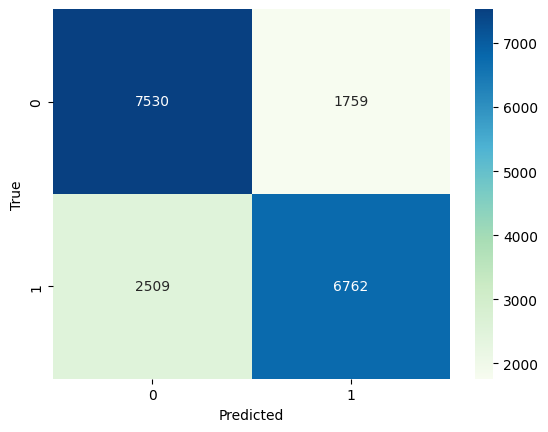

In [7109]:
tabla=confusion_matrix(y_test, y_pred)

sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

- **Calculo de las metricas**

In [7110]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.7700431034482759
Recall: 0.7293711573724517
Precision: 0.7935688299495365
f1 score: 0.7601169064748201


### » Creacion y download del df para entregar

In [7111]:
df_resultado = ""


def descargar_df(ids, prediccion):
    df_resultado = pd.DataFrame(zip(ids, prediccion),columns=['id','pred'])
    cantidad_columnas = len(df_resultado)

    if(26535 != len(df_resultado)):
      print(
                """
                ,adPPYba, 8b,dPPYba, 8b,dPPYba,  ,adPPYba,  8b,dPPYba,
                a8P_____88 88P'   "Y8 88P'   "Y8 a8"     "8a 88P'   "Y8
                8PP""""""" 88         88         8b       d8 88
                "8b,   ,aa 88         88         "8a,   ,a8" 88
                `"Ybbd8"' 88         88          `"YbbdP"'  88
                                                                    """  )

    df_resultado.to_csv('df_prediccion')
    files.download('df_prediccion')

### » Prediccion


In [7112]:
def predecir(DataFrame):
      df_trabajo_test_x = DataFrame.drop(['is_canceled', 'id'], axis='columns', inplace=False)
      ids = DataFrame['id'].copy()

      prediccion = tree_model.predict(X = df_trabajo_test_x)

      return (ids, prediccion)

In [7113]:
resultados = predecir(df_trabajo_test_dum)

ids = resultados[0]
prediccion = resultados[1]

#descargar_df(ids, prediccion)
